In [1]:
from GEVnonstat_v2.Automatic_GEV_fit import GEVnonstat
#from GEVnonstat_v3.Automatic_GEV_fit_v3_LBFGSB import GEVnonstat
import pandas as pd
import numpy as np

In [2]:
data = pd.read_table("Datos\\Hs_SS_PCs_Cantabria.txt")

In [3]:
# Columns for the Hs dataframe
cols_first = ['yyyy', 'mm', 'dd', 'Hs'] + [col for col in data.columns if col.startswith('PC') and not col.endswith('_SS')]

# Columns for the Surge dataframe
cols_second = ['yyyy', 'mm', 'dd', 'Surge'] + [col for col in data.columns if col.endswith('_SS')]

# Create the two DataFrames
df_hs = data[cols_first]
df_surge = data[cols_second]

We have to select the monthly maxima in both datasets.

In [4]:
idxHs = df_hs.groupby(['yyyy', 'mm'])['Hs'].idxmax()
mm_Hs = df_hs.loc[idxHs].reset_index(drop=True)

mm_Hs

,yyyy,mm,dd,Hs,PC0,PC1,PC2,PC3,PC4,PC5,...,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99
0,1979,1,11,6.737667,-4.879258,-38.462650,-6.904365,16.579365,28.582801,3.820993,...,0.566661,-1.965569,-5.668912,-0.079694,-1.794989,0.017304,2.910273,-0.767795,1.133959,0.415600
1,1979,2,13,7.223000,68.255979,35.952270,-23.178239,15.786726,5.118980,-18.698145,...,-0.261315,-2.164594,-0.266281,2.738915,-2.902866,0.373716,1.897770,-3.689377,0.066956,-1.253537
2,1979,3,28,6.000750,12.147227,17.948106,-14.349839,22.776178,18.723716,11.619776,...,0.075593,-0.131082,1.761591,1.725416,-0.683549,-0.097615,0.420316,-0.263751,-0.342562,1.895896
3,1979,4,3,4.830334,-20.691617,-4.474787,-7.456639,25.508485,6.601150,7.857793,...,-0.654015,0.899297,0.271443,-0.887978,1.000952,1.330452,-0.265943,2.143156,0.685956,-0.689545
4,1979,5,18,3.223500,-9.032429,-8.403713,-10.919392,11.812899,7.253037,9.841181,...,0.091077,-2.424763,-1.949773,1.610212,-1.911784,0.227927,-1.926034,-0.413418,-1.510489,0.760124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,2018,8,13,2.163750,-2.813634,-2.254472,-5.544413,-10.531519,-0.027142,-4.209493,...,-0.782444,0.891611,0.646292,-0.334735,-2.123266,0.646380,0.289359,-0.446949,0.327898,-1.341055
476,2018,9,21,2.315167,3.191434,-5.400348,-13.102866,-6.016336,-13.667698,-6.502697,...,1.869194,1.127246,2.149559,1.170888,-1.926971,-0.523695,-0.892947,1.180730,-0.902126,2.162502
477,2018,10,7,3.356917,-27.238443,3.786384,1.529805,4.108785,7.595919,4.341787,...,1.314939,1.158203,-1.705343,0.915670,-0.969995,-1.376848,-2.943228,0.369372,-0.685533,-0.363535
478,2018,11,18,4.281417,54.434581,-12.084489,-13.061880,-9.209878,-6.278984,1.927211,...,-0.811926,2.877611,2.706875,0.342005,-0.476164,-0.618794,1.683626,0.518795,-1.858572,0.547763


In [5]:
idxSurge = df_surge.groupby(['yyyy', 'mm'])['Surge'].idxmax()
mm_Surge = df_surge.loc[idxHs].reset_index(drop=True)

mm_Surge

,yyyy,mm,dd,Surge,PC0_SS,PC1_SS,PC2_SS,PC3_SS,PC4_SS,PC5_SS,...,PC65_SS,PC66_SS,PC67_SS,PC68_SS,PC69_SS,PC70_SS,PC71_SS,PC72_SS,PC73_SS,PC74_SS
0,1979,1,11,0.091708,13.063676,6.613850,3.327165,-3.612201,-4.810000,2.298981,...,0.001566,-0.012573,-0.001302,0.002784,0.000322,0.001474,-0.001032,0.004888,0.000479,-0.000566
1,1979,2,13,0.310167,25.712670,10.530151,6.926266,2.862347,-4.444636,2.551117,...,-0.004831,0.000456,-0.004053,0.001759,0.001246,-0.005081,-0.003663,0.000899,-0.001558,-0.001099
2,1979,3,28,0.167208,17.696176,3.420764,-0.284137,3.886603,-2.450485,0.428533,...,0.006769,-0.004223,-0.002211,0.001534,0.008302,0.001675,0.003724,-0.000643,-0.000246,-0.000187
3,1979,4,3,0.080167,11.674816,3.316786,-1.737312,2.211511,-2.470819,1.353620,...,-0.002053,-0.000525,-0.000652,-0.004574,0.001642,-0.000655,-0.000773,0.001920,0.002422,-0.000515
4,1979,5,18,0.039208,5.014881,-4.032115,-2.683082,-1.135247,0.288542,0.660431,...,-0.005198,0.000160,-0.005730,-0.001603,-0.000339,0.000526,-0.003392,-0.001430,0.001297,0.000189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,2018,8,13,0.006083,-2.349207,-2.178621,3.828632,0.694273,-0.477906,-0.011404,...,-0.001675,-0.001017,-0.000582,-0.001596,-0.000194,-0.002218,-0.001325,-0.000236,-0.000850,-0.000328
476,2018,9,21,-0.049750,-5.680856,-2.206999,2.462191,0.966025,0.064759,-0.579154,...,0.002456,0.001430,-0.001067,-0.000503,0.000978,-0.000289,-0.000282,0.000332,-0.000112,-0.000302
477,2018,10,7,-0.045667,0.289291,5.466526,1.469930,3.817758,-2.026907,-1.662982,...,0.001067,0.005174,0.006518,-0.004604,-0.001659,0.004016,-0.002879,-0.002288,-0.006593,0.001339
478,2018,11,18,0.099292,8.397164,0.398614,1.484636,4.067260,-2.244079,-0.545546,...,0.004166,-0.004962,-0.000613,0.000323,0.000667,-0.003457,0.000136,0.001821,0.001135,0.000520


In [6]:
days_in_month = {1: 31, 2: 28.25, 3: 31, 4: 30, 5: 31, 6: 30, 7: 31, 8: 31, 9: 30, 10: 31, 11: 30, 12: 31}
mm_Hs['time'] = mm_Hs['yyyy']-np.min(mm_Hs['yyyy']) + (mm_Hs['mm']-1) / 12 + mm_Hs['dd'] / mm_Hs['mm'].map(days_in_month) / 12
mm_Surge['time'] = mm_Surge['yyyy']-np.min(mm_Surge['yyyy']) + (mm_Surge['mm']-1) / 12 + mm_Surge['dd'] / mm_Surge['mm'].map(days_in_month) / 12
Hsdata = mm_Hs.drop(columns=["yyyy", "mm", "dd"])
Surgedata = mm_Surge.drop(columns=["yyyy", "mm", "dd"])

Fitting the Non Stationary GEV for Hs

In [7]:
hsmax = Hsdata.to_numpy()[:,0]
time = Hsdata.to_numpy()[:,-1]
covariates = {col: Hsdata[col] for col in Hsdata.columns[1:-1]}

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
autogev_hs2 = GEVnonstat(xt=hsmax,t=time,kt=None,covariates=covariates,ejemplo="Hs Monthly",trends=True, harm=False)
beta0,beta,alpha0,alpha,gamma0,gamma,betaT,auxvarphi_loc,list_loc,betaT2,auxvarphi_sc,list_sc,loglikeobj,grad,hessian,popt,stdpara = autogev_hs2.AutoAdjust()

Stationary GEV AIC: 1842.8949788334558 

Starting the Covariates iterative process


Covariate Iteration: 100%|██████████| 200/200 [13:55<00:00,  4.18s/it]


End of the Covariates iterative process
Covariates AIC: 809.9980224386235 

Starting trends process
Location trend parameter not significant
Scale trend parameter not significant


In [10]:
print("beta0",beta0)
print("beta",beta)
print("alpha0",alpha0)
print("alpha",alpha)
print("gamma0",gamma0)
print("gamma",gamma)
print("betaT",betaT)
print("varphi",auxvarphi_loc)
print("betaT2",betaT2)
print("varphi2",auxvarphi_sc)

beta0 2.4101047246967404
beta None
alpha0 -0.825147196626718
alpha None
gamma0 None
gamma None
betaT None
varphi [ 0.03159573 -0.0287114   0.03882961  0.03760962  0.01791649 -0.02919159
  0.0245065   0.03758169 -0.02660816  0.01216224  0.04925089 -0.0270424
  0.02502197  0.03061711 -0.01415268  0.03117078 -0.03207021  0.04573314
  0.04388434 -0.02882329 -0.02226496  0.05524313 -0.03172438 -0.10768847
 -0.02753345]
betaT2 None
varphi2 [ 0.0042668   0.00753874  0.01709685 -0.01484124 -0.01767173 -0.02593827
 -0.02111268 -0.03256472 -0.03548417  0.02202738  0.02919305  0.03732646
  0.09612873  0.09619574 -0.06310902 -0.0461371   0.07911598]


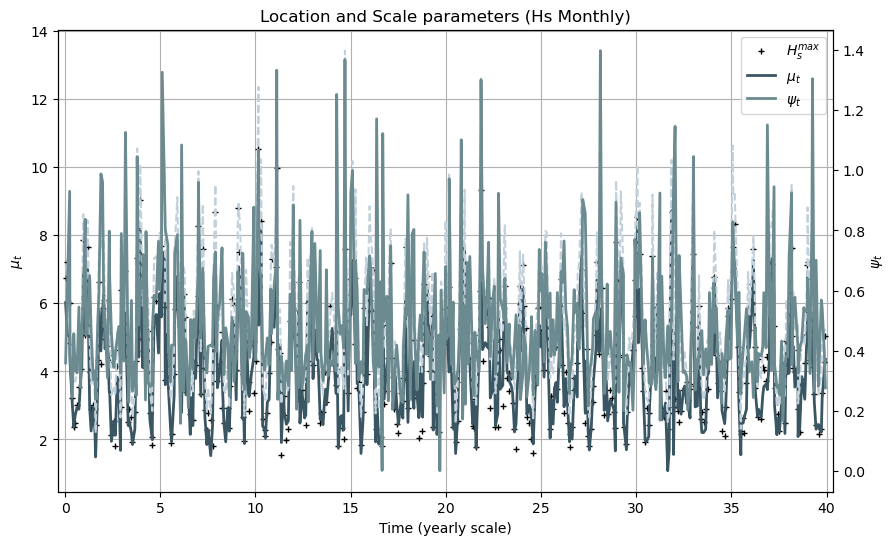

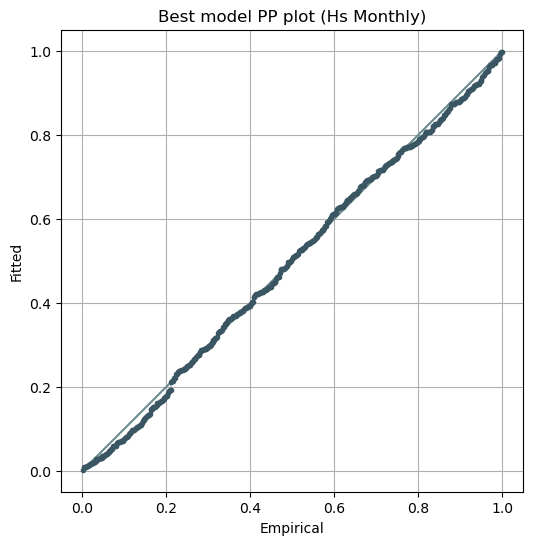

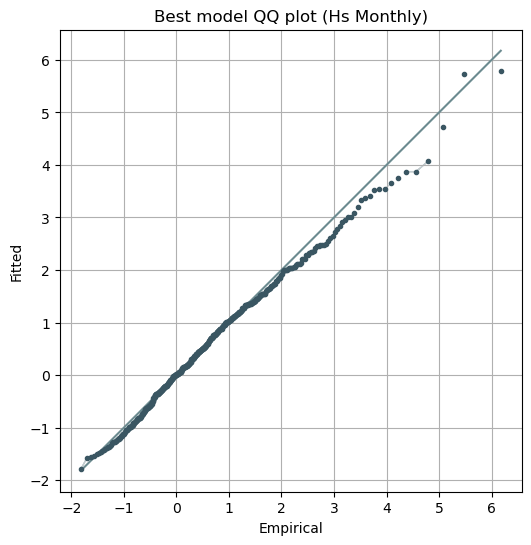

In [11]:
autogev_hs2.plot()

Fitting the non stationary GEV on Storm Surge

In [12]:
surgemax = Surgedata.to_numpy()[:,0]
surgetime = Surgedata.to_numpy()[:,-1]
surgecovariates = {col: Surgedata[col] for col in Surgedata.columns[1:-1]}

In [13]:
autogev_ss = GEVnonstat(xt=surgemax,t=surgetime,kt=None,covariates=surgecovariates,ejemplo="Storm Surge",trends=True, harm=False)
beta0,beta,alpha0,alpha,gamma0,gamma,betaT,auxvarphi_loc,list_loc,betaT2,auxvarphi_sc,list_sc,loglikeobj,grad,hessian,popt,stdpara = autogev_ss.AutoAdjust()

Stationary GEV AIC: -896.3606505543069 

Starting the Covariates iterative process


Covariate Iteration: 100%|██████████| 150/150 [28:47<00:00, 11.52s/it]


End of the Covariates iterative process
Covariates AIC: -2393.2150934847623 

Starting trends process
Adding trend term to location parameter
Location trend AIC:  -2394.7938330094576
Scale trend parameter not significant


In [14]:
print("beta0",beta0)
print("beta",beta)
print("alpha0",alpha0)
print("alpha",alpha)
print("gamma0",gamma0)
print("gamma",gamma)
print("betaT",betaT)
print("varphi",auxvarphi_loc)
print("betaT2",betaT2)
print("varphi2",auxvarphi_sc)

beta0 -0.01957447430352838
beta None
alpha0 -4.105773136242706
alpha None
gamma0 None
gamma None
betaT 0.0001308204433433102
varphi [ 0.01138167 -0.00791849  0.01082725  0.00481179 -0.00295641  0.01812102
  0.02231527 -0.02855762 -0.13333209]
betaT2 None
varphi2 [0.00978266]


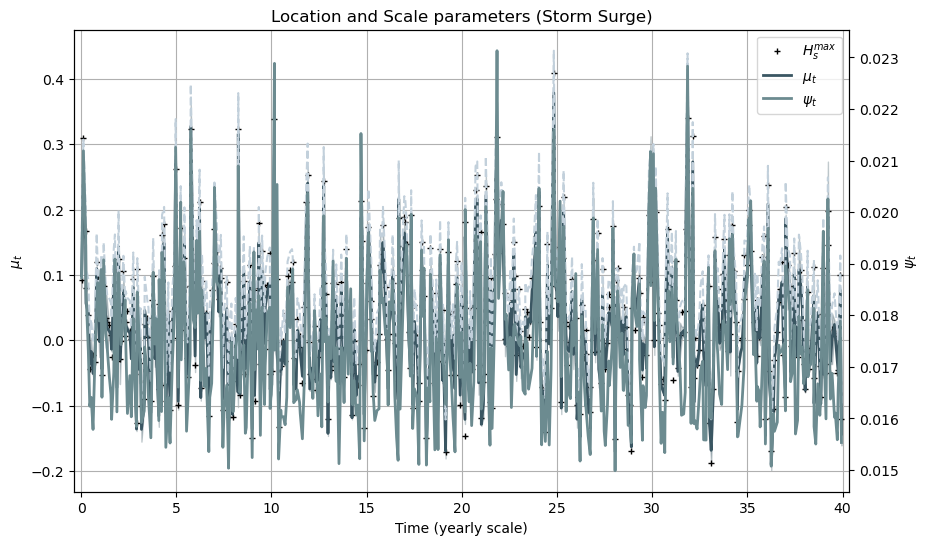

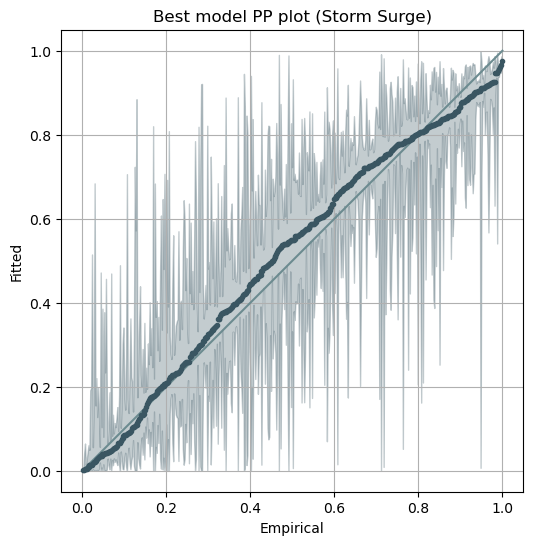

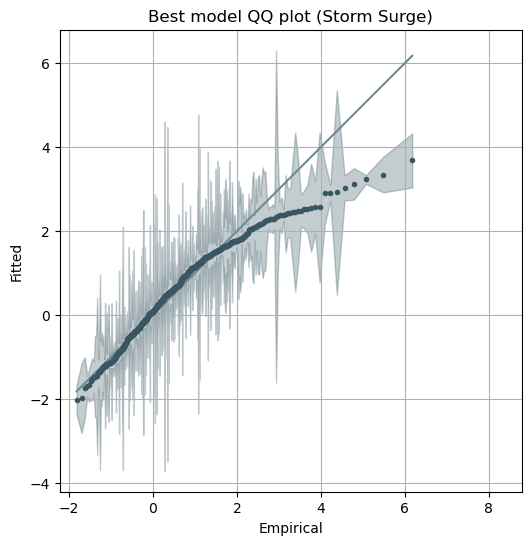

In [15]:
autogev_ss.plot()